<div style="background: linear-gradient(135deg, #FF0000, #FF5733, #FFA500); color:#fff; padding:20px; border-radius:10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); text-align:center;">

<h1 style="font-size:24px;">🌟 Exercise 12: Crafting the Perfect Shopping Experience 🌟</h1>

<p style="font-size:16px;">Get ready to dive into the exciting world of recommendation systems! 🛒 In this exercise, we'll harness the power of data to create a shopping experience that's not just tailored, but downright magical. As we navigate our online retail dataset, we'll unlock the secrets to suggesting products that customers will adore. Join us in this exercise and let's revolutionize the way we shop and recommend!</p>

</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
data = pd.read_excel('Online Retail.xlsx')

In [3]:
data.head().T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
StockCode,85123A,71053,84406B,84029G,84029E
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6,6,8,6,6
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
UnitPrice,2.55,3.39,2.75,3.39,3.39
CustomerID,17850.0,17850.0,17850.0,17850.0,17850.0
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


<div style="background-color:#f7f7f7; padding:20px; border-radius:10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">

<h1 style="color:#ff5733;">🌟 Online Retail Dataset Explanation 🌟</h1>

<p style="font-size:16px; color:#444;">Welcome to the world of retail data magic! 🛍️ This dataset holds the key to understanding your online retail transactions. Let's embark on a colorful journey through its columns:</p>

<ol style="font-size:14px; color:#555; padding-left:20px;">
    <li><strong>InvoiceNo:</strong> 🧾 This unique identifier is your ticket to unlocking the secrets of each retail invoice or transaction.</li>
    <li><strong>StockCode:</strong> 📦 Think of this as the secret code for each product or item, making it easy to identify what's being sold.</li>
    <li><strong>Description:</strong> 📝 This column provides a human-friendly description of the product, making it easy to understand.</li>
    <li><strong>Quantity:</strong> 📦💨 This superhero reveals the quantity of each product sold in the transaction.</li>
    <li><strong>InvoiceDate:</strong> 📅 This timestamp lets you time-travel to the exact moment each transaction occurred.</li>
    <li><strong>UnitPrice:</strong> 💰 Here's the price per item, helping you understand the cost of each product.</li>
    <li><strong>CustomerID:</strong> 🕵️‍♂️ Every hero needs an identity, and this column gives customers their unique secret code.</li>
    <li><strong>Country:</strong> 🌎 This adds a dash of global flair, showing you where your customers are from.</li>
</ol>

<p style="font-size:16px; color:#444;">With this dataset, you're equipped for thrilling retail analytics adventures! Whether you're forecasting sales, segmenting customers, or analyzing product performance, the possibilities are as colorful as this template. Happy analyzing! 🚀</p>

</div>


<div style="background: linear-gradient(135deg, #FF00FF, #FF1493, #FF69B4); color:#fff; padding:20px; border-radius:10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); text-align:center;">

<h1 style="font-size:24px;">🌟 Unveiling the Retail Magic: Exploring Our Online Retail Dataset 🌟</h1>

<p style="font-size:16px;">Prepare to be transported to a world where data meets retail enchantment! 🪄 In this extraordinary dataset, each row tells a story of transactions, products, customers, and global adventures. Let's embark on an analytical journey through the aisles of retail wonders and reveal the secrets hidden within each column!</p>

</div>

In [4]:
def data_information(data):
    
    print("\033[1;41m"+'Informations:'+"\033[0m")
    print('\033[1;41m' + '=' + "\033[0m")
    print(data.info())
    print('\033[1;41m' + '=' + "\033[0m")
    
    print("\033[1;42m"+'Column names:'+"\033[0m")
    print('\033[1;42m' + '=' + "\033[0m")
    print(data.columns)
    print('\033[1;42m' + '=' + "\033[0m")
    
    print('\033[1;45m' + '=' + "\033[0m")
    print("\033[1;45m"+'Shape of dataset:'+"\033[0m", data.shape)
    print('\033[1;45m' + '=' + "\033[0m")
    
    print("\033[1;46m"+'Is Null data:'+"\033[0m")
    print('\033[1;46m' + '=' + "\033[0m")
    print(data.isnull().any())
    print('\033[1;46m' + '=' + "\033[0m")
    
    print("\033[1;47m"+'Number of Null data:'+"\033[0m")
    print('\033[1;47m' + '=' + "\033[0m")
    print(data.isnull().sum())
    print('\033[1;47m' + '=' + "\033[0m")
    
    print("\033[1;43m"+'Unique data:'+"\033[0m")
    print('\033[1;43m' + '=' + "\033[0m")
    print(data.nunique())
    print('\033[1;43m' + '=' + "\033[0m")
    
    print("\033[1;44m"+'Statistical reports:'+"\033[0m")
    print('\033[1;44m' + '=' + "\033[0m")
    print(data.describe().T)
    print('\033[1;44m' + '=' + "\033[0m")

In [5]:
data_information(data)

Informations:
=
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
=
Column names:
=
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
=
=
Shape of dataset: (541909, 8)
=
Is Null data:
=
InvoiceNo      False
StockCode      False
Description     True
Quantity   

<div style="background: linear-gradient(135deg, #00FFFF, #00CED1, #20B2AA); color:#000; padding:20px; border-radius:10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); text-align:center;">

<h1 style="font-size:24px;">📊 Visualization 📊</h1>

<p style="font-size:16px;">Bringing Your Online Retail Data to Life Through Visualizations</p>

</div>


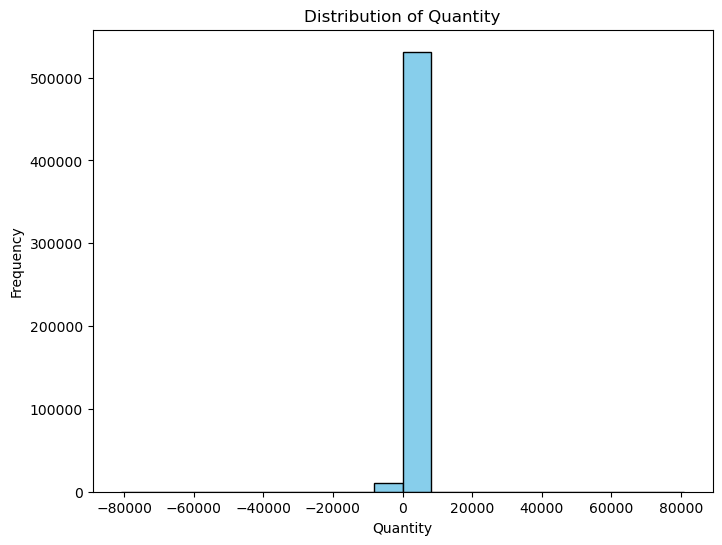

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(data['Quantity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

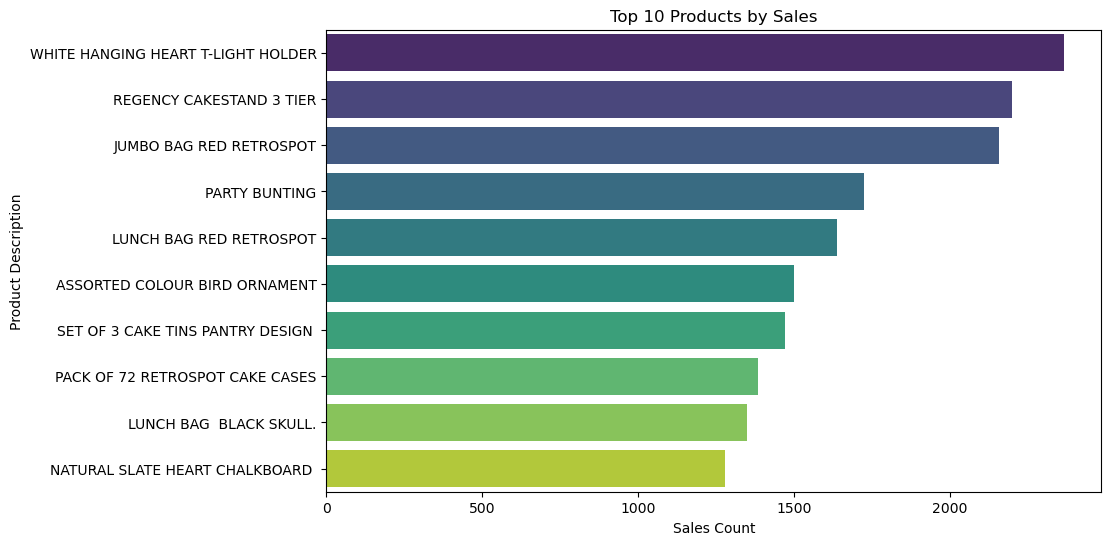

In [7]:
top_products = data['Description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales Count')
plt.ylabel('Product Description')
plt.show()


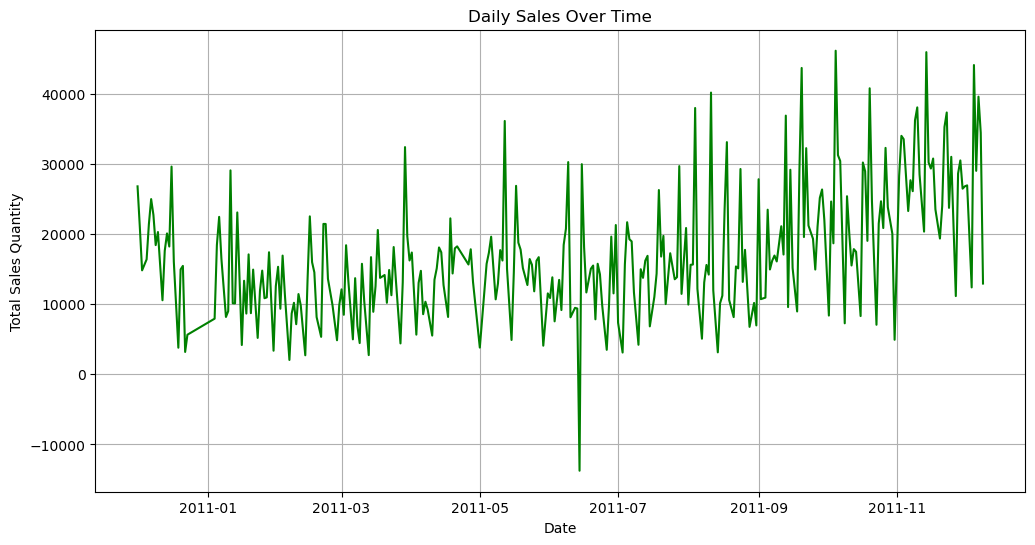

In [9]:
# Group the data by day and sum the quantities
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, color='green')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.grid(True)
plt.show()

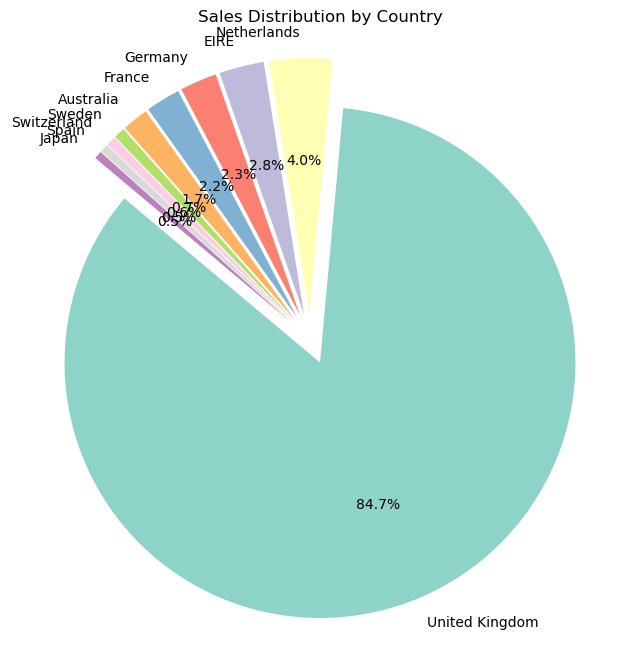

In [10]:
country_sales = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # Explode the top 10 countries

plt.figure(figsize=(8, 8))
plt.pie(country_sales, labels=country_sales.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=sns.color_palette('Set3'))
plt.title('Sales Distribution by Country')
plt.axis('equal')
plt.show()

<div style="background: linear-gradient(135deg, #0000FF, #0074E4, #00BFFF); color:#fff; padding:20px; border-radius:10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); text-align:center;">

<h1 style="font-size:24px;">🛒 Preprocessing 🛒</h1>

<p style="font-size:16px;">Getting Your Online Retail Data Ready for Analysis</p>

</div>

In [11]:
data.dropna(subset=['Description'], inplace=True)

In [12]:
# Create a dictionary to store mapping of 'InvoiceNo' to a new customer ID
invoice_customer_mapping = {}

# Initialize a counter for generating new customer IDs
customer_id_counter = 1

# Iterate through the DataFrame
for index, row in data.iterrows():
    invoice_no = row['InvoiceNo']
    if pd.isnull(row['CustomerID']):
        if invoice_no not in invoice_customer_mapping:
            invoice_customer_mapping[invoice_no] = customer_id_counter
            customer_id_counter += 1
        data.at[index, 'CustomerID'] = invoice_customer_mapping[invoice_no]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 53.2+ MB


In [14]:
data.head().T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
StockCode,85123A,71053,84406B,84029G,84029E
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6,6,8,6,6
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
UnitPrice,2.55,3.39,2.75,3.39,3.39
CustomerID,17850.0,17850.0,17850.0,17850.0,17850.0
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


In [15]:
data['CustomerID']= data['CustomerID'].astype(int)

In [16]:
# Create a user-item matrix
user_item_matrix = data.pivot_table(index='CustomerID', 
                                    columns='Description', 
                                    values='Quantity', 
                                    fill_value=0)

In [17]:
user_item_matrix

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
18281,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
18282,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data['InvoiceDay'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

In [19]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01


In [20]:
dt.timedelta(1)

datetime.timedelta(days=1)

In [21]:
pin_date = max(data['InvoiceDay']) + dt.timedelta(1)
pin_date

Timestamp('2011-12-10 00:00:00')

In [22]:
data['TotalSum'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34


In [23]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDay': lambda x: (pin_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})
rfm

,InvoiceDay,InvoiceNo,TotalSum
CustomerID,,,
1,374,527,5521.14
2,374,2,2.97
3,374,1,99.75
4,374,2,6.70
5,374,592,6915.65
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,13,176.60


In [24]:
rfm.rename(columns= {
    'InvoiceDay': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'Monetary'
}, inplace=True)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
1,374,527,5521.14
2,374,2,2.97
3,374,1,99.75
4,374,2,6.70
5,374,592,6915.65
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,13,176.60


In [25]:
r_labels = range(4, 0, -1) #[4, 3, 2, 1]
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_labels = range(1, 5) # [1, 2, 3, 4]
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

In [26]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
1,374,527,5521.14,1,4,4
2,374,2,2.97,1,1,1
3,374,1,99.75,1,1,1
4,374,2,6.70,1,1,1
5,374,592,6915.65,1,4,4
...,...,...,...,...,...,...
18280,278,10,180.60,1,2,2
18281,181,7,80.82,2,2,1
18282,8,13,176.60,4,2,2


In [27]:
data[data['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,TotalSum
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011-01-18,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,2011-01-18,-77183.6


<div style="background: linear-gradient(135deg, #00FF00, #008000, #006400); color:#fff; padding:20px; border-radius:10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); text-align:center;">

<h1 style="font-size:24px;">🔍 Clustering 🔍</h1>

<p style="font-size:16px;">Unlocking Insights through Data Clustering: Revealing Hidden Patterns in Your Online Retail Data</p>

</div>

In [28]:
X = rfm[['R', 'F', 'M']]
kmeans = KMeans(n_clusters=10, init='k-means++', n_init = 'auto', max_iter=300)
cluster_assignments = kmeans.fit(X)

In [29]:
# Add cluster assignments to the DataFrame
rfm['Cluster'] = cluster_assignments.labels_

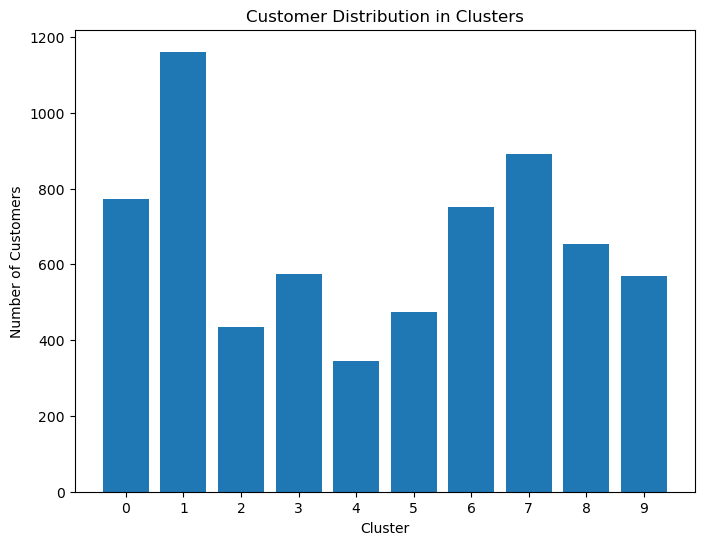

In [31]:
# Visualize the distribution of customers in each cluster
cluster_counts = rfm['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, tick_label=cluster_counts.index)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution in Clusters')
plt.show()

In [33]:
# Print the customers in each cluster
num_clusters = 10
for cluster_id in range(num_clusters):
    customers_in_cluster = rfm[rfm['Cluster'] == cluster_id].index
    print(f'Cluster {cluster_id}: {len(customers_in_cluster)} customers')
    # You can also explore the products purchased by customers in each cluster, if needed

Cluster 0: 772 customers
Cluster 1: 1161 customers
Cluster 2: 434 customers
Cluster 3: 575 customers
Cluster 4: 344 customers
Cluster 5: 475 customers
Cluster 6: 752 customers
Cluster 7: 892 customers
Cluster 8: 654 customers
Cluster 9: 569 customers


In [34]:
rfm[rfm['Cluster'] == 7]

,Recency,Frequency,Monetary,R,F,M,Cluster
CustomerID,,,,,,,
7,373,11,45.85,1,2,1,7
8,373,15,54.25,1,2,1,7
9,373,19,66.65,1,2,1,7
11,373,14,252.30,1,2,2,7
19,372,10,69.30,1,2,1,7
...,...,...,...,...,...,...,...
18250,302,22,342.92,1,2,2,7
18262,141,13,149.48,2,2,2,7
18269,359,8,138.90,1,2,2,7


<div style="background: linear-gradient(135deg, #FFA500, #FF6347); color:#fff; padding:20px; border-radius:10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); text-align:center;">

<h1 style="font-size:24px;">🎯 Recommendation Systems 🎯</h1>

<p style="font-size:16px;">Guiding Shoppers with Personalized Recommendations: Harnessing the Power of Data in Your Online Retail Universe</p>

</div>


In [35]:
#Generate customized offers by leveraging the most frequently purchased products within each customer cluster.
recommended_products = {}
for cluster in range(num_clusters):
    cluster_data = rfm[rfm["Cluster"] == cluster]
    max_purchase_product = data[data["CustomerID"].isin(cluster_data.index)].groupby(["Description"])["Quantity"].sum().idxmax()
    recommended_products[cluster] = max_purchase_product
    print(recommended_products)

{0: 'SMALL CHINESE STYLE SCISSOR'}
{0: 'SMALL CHINESE STYLE SCISSOR', 1: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'}
{0: 'SMALL CHINESE STYLE SCISSOR', 1: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 2: 'PACK OF 72 RETROSPOT CAKE CASES'}
{0: 'SMALL CHINESE STYLE SCISSOR', 1: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 2: 'PACK OF 72 RETROSPOT CAKE CASES', 3: 'did  a credit  and did not tick ret'}
{0: 'SMALL CHINESE STYLE SCISSOR', 1: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 2: 'PACK OF 72 RETROSPOT CAKE CASES', 3: 'did  a credit  and did not tick ret', 4: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'}
{0: 'SMALL CHINESE STYLE SCISSOR', 1: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 2: 'PACK OF 72 RETROSPOT CAKE CASES', 3: 'did  a credit  and did not tick ret', 4: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 5: 'came coded as 20713'}
{0: 'SMALL CHINESE STYLE SCISSOR', 1: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 2: 'PACK OF 72 RETROSPOT CAKE CASES', 3: 'did  a credit  and did not tick ret', 4: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 5: 'came co

In [40]:
# Show offers to users
pd.DataFrame({
    "Cluster": list(recommended_products.keys()),
    "RecommendedProduct": list(recommended_products.values())
}).style.background_gradient(cmap="viridis")

,Cluster,RecommendedProduct
0,0,SMALL CHINESE STYLE SCISSOR
1,1,WORLD WAR 2 GLIDERS ASSTD DESIGNS
2,2,PACK OF 72 RETROSPOT CAKE CASES
3,3,did a credit and did not tick ret
4,4,WORLD WAR 2 GLIDERS ASSTD DESIGNS
5,5,came coded as 20713
6,6,RABBIT NIGHT LIGHT
7,7,POPART WOODEN PENCILS ASST
8,8,ASSTD DESIGN 3D PAPER STICKERS
9,9,CHARLOTTE BAG SUKI DESIGN


In [37]:
# Generate proposals for each client
customer_recommendations = {}

for cluster in range(10):
    # Selection of customers who belong to the respective cluster
    cluster_data = rfm[rfm['Cluster'] == cluster]

    # Find the product with the most purchases in this cluster
    max_purchase_product = data[data['CustomerID'].isin(cluster_data.index)].groupby('Description')['Quantity'].sum().idxmax()

    # Find customers who have not purchased this product
    customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]

    # Add the product to the offer list for each customer
    for customer_id in customers_without_max_product['CustomerID'].unique():
        if customer_id not in customer_recommendations:
            # If the customer is getting the recommended products for the first time, make the offer list empty (empty list).
            customer_recommendations[customer_id] = []

        # Offer the customer the most purchased products
        customer_recommendations[customer_id].append(max_purchase_product)
for customer_id, product in customer_recommendations.items():
    print(f"customer: {customer_id}, recommended_products: {product}")

C:\Users\endur\AppData\Local\Temp\ipykernel_17548\669596800.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]
C:\Users\endur\AppData\Local\Temp\ipykernel_17548\669596800.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]
C:\Users\endur\AppData\Local\Temp\ipykernel_17548\669596800.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]
C:\Users\endur\AppData\Local\Temp\ipykernel_17548\669596800.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data

customer: 15983, recommended_products: ['SMALL CHINESE STYLE SCISSOR']
customer: 15867, recommended_products: ['SMALL CHINESE STYLE SCISSOR', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'RABBIT NIGHT LIGHT']
customer: 13848, recommended_products: ['SMALL CHINESE STYLE SCISSOR']
customer: 17816, recommended_products: ['SMALL CHINESE STYLE SCISSOR']
customer: 17890, recommended_products: ['SMALL CHINESE STYLE SCISSOR']
customer: 18077, recommended_products: ['SMALL CHINESE STYLE SCISSOR', 'RABBIT NIGHT LIGHT']
customer: 18196, recommended_products: ['SMALL CHINESE STYLE SCISSOR']
customer: 16377, recommended_products: ['SMALL CHINESE STYLE SCISSOR']
customer: 13742, recommended_products: ['SMALL CHINESE STYLE SCISSOR', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']
customer: 18009, recommended_products: ['SMALL CHINESE STYLE SCISSOR']
customer: 12576, recommended_products: ['SMALL CHINESE STYLE SCISSOR']
customer: 12748, recommended_products: ['SMALL CHINESE STYLE SCISSOR', 'PACK OF 72 RETROSPOT CAKE CAS

C:\Users\endur\AppData\Local\Temp\ipykernel_17548\669596800.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]
C:\Users\endur\AppData\Local\Temp\ipykernel_17548\669596800.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]
C:\Users\endur\AppData\Local\Temp\ipykernel_17548\669596800.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]
C:\Users\endur\AppData\Local\Temp\ipykernel_17548\669596800.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data